# Proyek Klasifikasi Gambar: [Full emoji image dataset]
- **Nama:** Chindy Rahmawati
- **Email:** mc282d5x2413@student.devacademy.id
- **ID Dicoding:** MC282D5X2413

## Import Semua Packages/Library yang Digunakan

In [1]:
import os, shutil
import zipfile
import random
from typing import List, Tuple
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
import os
from pathlib import Path
from typing import List, Tuple
import numpy as np
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import random
from tqdm import tqdm
import cv2
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from IPython.display import display
import requests
from ipywidgets import widgets, interact
import io
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# versi TensorFlow yang dipakai
print(tf.__version__)

2.18.0


## Data Preparation

In [3]:
# Import module
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chindyrahmawati","key":"63a5a29d4fcbb8a300ccc736a5b346ba"}'}

### membuat directory

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download dataset rice
!kaggle datasets download muratkokludataset/rice-image-dataset

# Unzip dataset rice
!unzip rice-image-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

### Data Loading

In [6]:
from pathlib import Path
from typing import List, Tuple
from PIL import Image

def list_image_folders(
    dataset_path: str = "Rice_Image_Dataset/",
    check_images: bool = True,
    min_images: int = 1,
    show_resolution: bool = True
) -> List[Tuple[str, int]]:
    """
    Menampilkan daftar folder dalam dataset beserta jumlah gambar dan resolusi gambar pertama.

    Parameters:
    - dataset_path: Path ke direktori dataset.
    - check_images: Apakah akan menghitung jumlah gambar dalam folder.
    - min_images: Minimum jumlah gambar agar folder ditampilkan.
    - show_resolution: Apakah akan menampilkan resolusi gambar pertama.

    Returns:
    - List of tuples: (nama_folder, jumlah_gambar)
    """
    path = Path(dataset_path)

    if not path.exists():
        raise FileNotFoundError(f"Error: Direktori '{dataset_path}' tidak ditemukan.")
    if not path.is_dir():
        raise NotADirectoryError(f"Error: '{dataset_path}' bukan direktori.")

    folders = []
    valid_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'}

    for folder in path.iterdir():
        if folder.is_dir():
            image_files = [
                f for f in folder.iterdir()
                if f.is_file() and f.suffix.lower() in valid_extensions
            ]
            image_count = len(image_files) if check_images else -1

            if image_count >= min_images:
                folders.append((folder.name, image_count, image_files))

    folders.sort(key=lambda x: x[0].lower())

    if not folders:
        print("Tidak ada folder dengan gambar yang ditemukan.")
        return []

    print(f"Ditemukan {len(folders)} folder di '{path.resolve()}':\n")
    max_name_length = max(len(name) for name, _, _ in folders)

    for idx, (name, count, images) in enumerate(folders, start=1):
        count_str = f"({count} gambar)" if check_images else ""
        resolution_info = ""

        if show_resolution and images:
            try:
                with Image.open(images[0]) as img:
                    resolution_info = f"- Resolusi pertama: {img.width}x{img.height}"
            except Exception:
                resolution_info = "- [Gagal membaca resolusi]"

        print(f"{idx:2d}. {name:{max_name_length}} {count_str} {resolution_info}")

    return [(name, count) for name, count, _ in folders]


In [7]:
if __name__ == "__main__":
    # Menampilkan daftar folder di dalam direktori 'Rice_Image_Dataset/'
    folder_details = list_image_folders(
        dataset_path="Rice_Image_Dataset/",
        check_images=True,
        min_images=5,
        show_resolution=True
    )

    # Mengumpulkan nama-nama folder yang valid
    available_folders = [name for name, _ in folder_details]

    if available_folders:
        print("\nFolder yang ditemukan:")
        for idx, folder_name in enumerate(available_folders, start=1):
            print(f"{idx}. {folder_name}")
    else:
        print("\nTidak ada folder yang memenuhi kriteria.")


Ditemukan 5 folder di '/content/Rice_Image_Dataset':

 1. Arborio   (15000 gambar) - Resolusi pertama: 250x250
 2. Basmati   (15000 gambar) - Resolusi pertama: 250x250
 3. Ipsala    (15000 gambar) - Resolusi pertama: 250x250
 4. Jasmine   (15000 gambar) - Resolusi pertama: 250x250
 5. Karacadag (15000 gambar) - Resolusi pertama: 250x250

Folder yang ditemukan:
1. Arborio
2. Basmati
3. Ipsala
4. Jasmine
5. Karacadag


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image, UnidentifiedImageError

def plot_category_samples(
    dataset_path: str = "Rice_Image_Dataset/",
    samples_per_category: int = 5,
    figsize: tuple = (14, 6),
    label_fontsize: int = 12,
    dpi: int = 100
) -> plt.Figure:
    """
    Menampilkan beberapa sampel gambar dari setiap kategori dalam dataset.

    Parameters:
    - dataset_path: Lokasi direktori dataset.
    - samples_per_category: Banyaknya gambar yang ditampilkan per kategori.
    - figsize: Ukuran keseluruhan figure (lebar, tinggi).
    - label_fontsize: Ukuran font untuk label kategori.
    - dpi: Resolusi gambar output.

    Returns:
    - Objek Figure dari matplotlib.
    """
    root_path = Path(dataset_path)

    if not root_path.exists():
        raise FileNotFoundError(f"Direktori '{dataset_path}' tidak ditemukan.")
    if not root_path.is_dir():
        raise NotADirectoryError(f"'{dataset_path}' bukan sebuah folder.")

    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}
    categories = []

    # Memfilter folder yang berisi gambar
    for folder in root_path.iterdir():
        if folder.is_dir():
            files = list(folder.glob("*"))
            if any(file.suffix.lower() in valid_extensions for file in files):
                categories.append(folder.name)

    categories.sort()

    if not categories:
        print("Tidak ditemukan kategori dengan gambar valid.")
        return None

    n_rows = len(categories)
    n_cols = samples_per_category
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(figsize[0], figsize[1] + n_rows * 0.5),
        dpi=dpi,
        gridspec_kw={'wspace': 0.05, 'hspace': 0.3}
    )

    if n_rows == 1:
        axes = np.expand_dims(axes, axis=0)

    max_label_length = max(len(cat) for cat in categories)
    plt.subplots_adjust(left=0.2 + 0.01 * max_label_length)

    for row_idx, category in enumerate(categories):
        category_path = root_path / category
        image_files = [
            file for file in category_path.iterdir()
            if file.is_file() and file.suffix.lower() in valid_extensions
        ]

        sample_count = min(samples_per_category, len(image_files))
        selected_images = np.random.choice(image_files, size=sample_count, replace=False) if sample_count else []

        for col_idx in range(n_cols):
            ax = axes[row_idx, col_idx]
            ax.axis('off')
            ax.set_facecolor('#f0f0f0')

            if col_idx < len(selected_images):
                try:
                    img = Image.open(selected_images[col_idx])
                    ax.imshow(img)
                    for spine in ax.spines.values():
                        spine.set_visible(True)
                        spine.set_edgecolor('#808080')
                        spine.set_linewidth(0.5)
                except (UnidentifiedImageError, OSError) as e:
                    _add_error_text(ax, f"Gagal membuka gambar: {e}")
            else:
                _add_error_text(ax, "Gambar tidak tersedia")

        axes[row_idx, 0].text(
            -0.3, 0.5,
            category,
            transform=axes[row_idx, 0].transAxes,
            fontsize=label_fontsize,
            fontweight='bold',
            va='center',
            ha='right',
            bbox=dict(
                boxstyle='round',
                facecolor='white',
                edgecolor='#404040',
                alpha=0.8,
                pad=0.3
            )
        )

    plt.show()
    return fig

def _add_error_text(ax, message: str):
    """Menampilkan pesan kesalahan pada subplot."""
    ax.text(
        0.5, 0.5,
        message,
        ha='center',
        va='center',
        fontsize=8,
        color='red',
        wrap=True
    )
    ax.set_facecolor('#fff0f0')


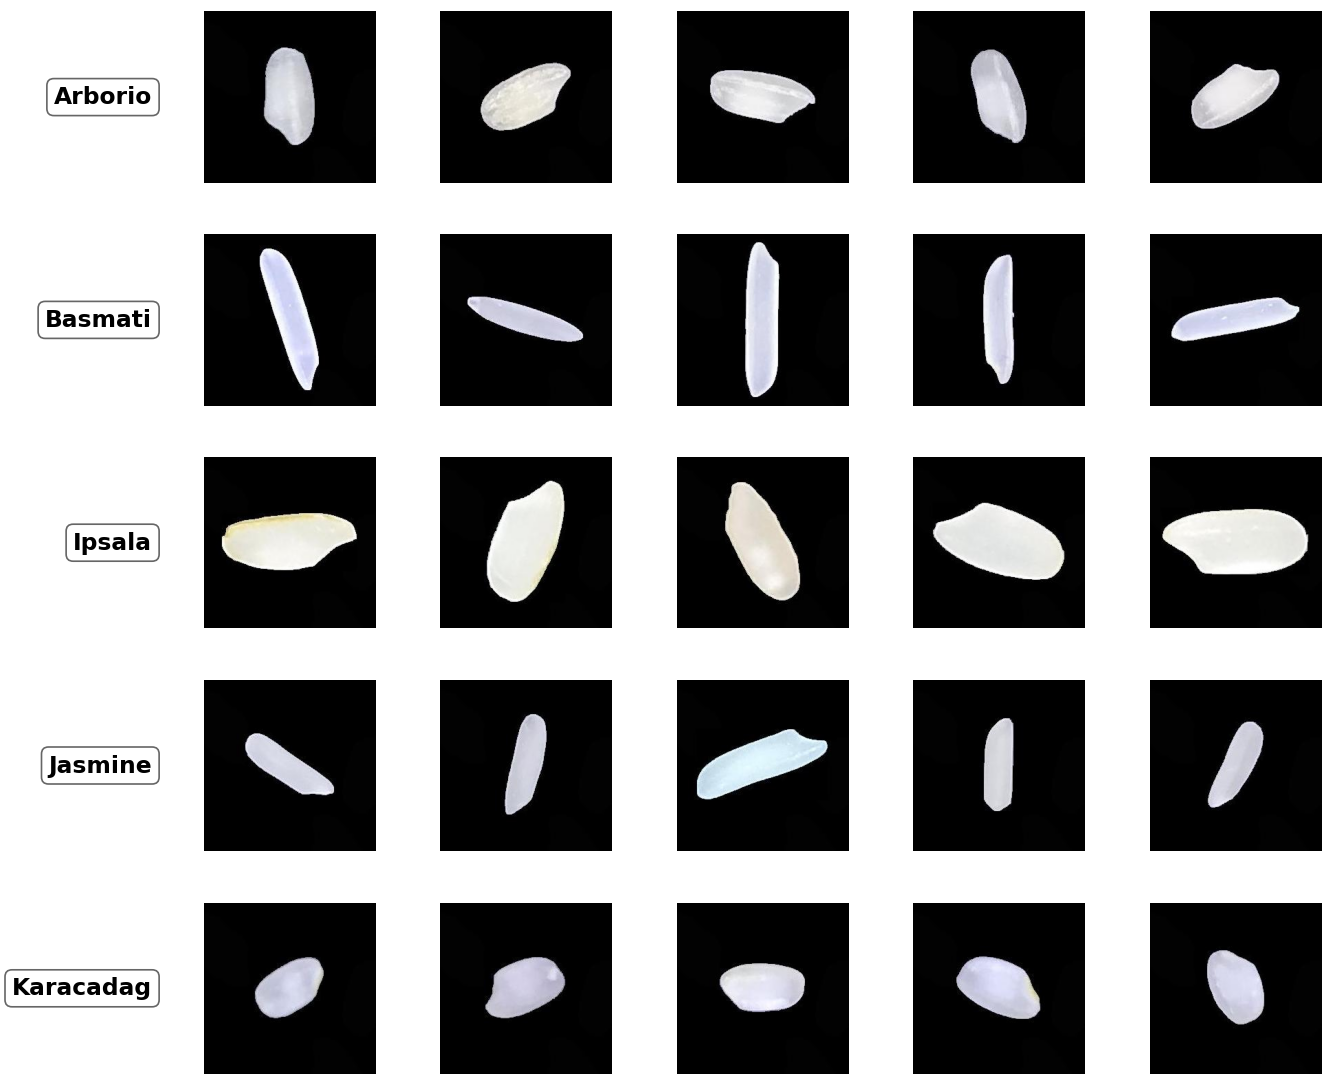

In [9]:
if __name__ == "__main__":
    fig = plot_category_samples(
        dataset_path="Rice_Image_Dataset/",
        samples_per_category=5,
        figsize=(16, 9),
        label_fontsize=14,
        dpi=120
    )

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

def analyze_dataset_distribution(dataset_path: str = "Rice_Image_Dataset/") -> pd.DataFrame:
    """
    Menganalisis dan memvisualisasikan sebaran kategori gambar dalam dataset.

    Parameters:
    - dataset_path: Lokasi folder utama dataset

    Returns:
    - DataFrame berisi detail gambar (path, nama file, label, ekstensi)
    """
    base_path = Path(dataset_path)
    allowed_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'}

    # Validasi direktori
    if not base_path.exists():
        raise FileNotFoundError(f"Direktori '{dataset_path}' tidak ditemukan.")
    if not base_path.is_dir():
        raise NotADirectoryError(f"'{dataset_path}' bukan sebuah folder.")

    records = []
    for file in base_path.rglob('*'):
        if file.is_file() and file.suffix.lower() in allowed_extensions:
            label = file.relative_to(base_path).parts[0]
            records.append({
                "path": str(file),
                "file_name": file.name,
                "label": label,
                "extension": file.suffix.lower()
            })

    if not records:
        raise ValueError("Dataset tidak mengandung gambar dengan format valid.")

    df = pd.DataFrame(records)

    # Membuat visualisasi distribusi label
    plt.figure(figsize=(14, 8))
    ax = sns.countplot(
        data=df,
        y="label",
        hue="label",
        order=df["label"].value_counts().index,
        palette="viridis",
        legend=False
    )

    total_images = len(df)
    for patch in ax.patches:
        count = patch.get_width()
        ax.annotate(
            f"{int(count)}\n({count/total_images:.1%})",
            (count + 0.5, patch.get_y() + patch.get_height() / 2),
            ha="left",
            va="center"
        )

    plt.title(f"Penyebaran Gambar pada Dataset - {total_images} Gambar dalam {df['label'].nunique()} Kategori", fontsize=14)
    plt.xlabel("Jumlah Gambar", labelpad=15)
    plt.ylabel("Kategori", labelpad=15)
    plt.xlim(0, df["label"].value_counts().max() * 1.15)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return df


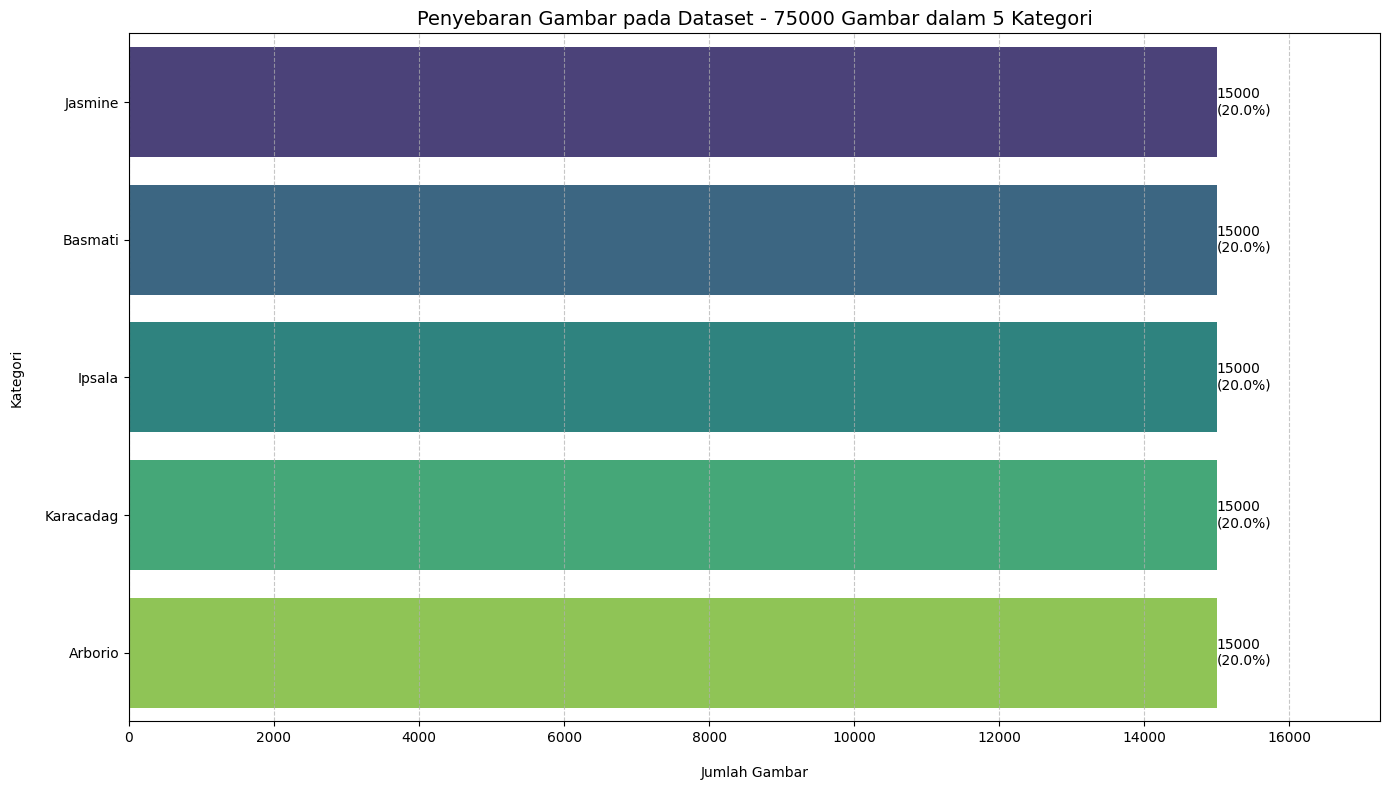


Contoh data:
                                                    path  \
41174       Rice_Image_Dataset/Ipsala/Ipsala (11691).jpg   
51693  Rice_Image_Dataset/Karacadag/Karacadag (2158).jpg   
60760      Rice_Image_Dataset/Arborio/Arborio (4173).jpg   
4887       Rice_Image_Dataset/Jasmine/Jasmine (5047).jpg   
67772      Rice_Image_Dataset/Arborio/Arborio (8400).jpg   

                  file_name      label extension  
41174    Ipsala (11691).jpg     Ipsala      .jpg  
51693  Karacadag (2158).jpg  Karacadag      .jpg  
60760    Arborio (4173).jpg    Arborio      .jpg  
4887     Jasmine (5047).jpg    Jasmine      .jpg  
67772    Arborio (8400).jpg    Arborio      .jpg  


In [11]:
if __name__ == "__main__":
    dataset_df = analyze_dataset_distribution(dataset_path='Rice_Image_Dataset/')
    print("\nContoh data:")
    print(dataset_df.sample(5))

In [12]:
from PIL import Image
import os

def print_images_resolution(directory):
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)

        if not os.path.isdir(subdir_path):
            continue

        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images} gambar")
        total_images += num_images

        unique_sizes = set()  # reset per kategori
        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except Exception as e:
                print(f"Error membuka {img_path}: {e}")

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal semua gambar: {total_images}")


# Data Preprocessing

---



## Data Augmentasi

In [13]:
import tensorflow as tf
import cv2
import numpy as np
import random
from pathlib import Path
from tqdm import tqdm
import shutil

class RiceAugmentor:
    def __init__(self, target_size=64):
        self.target_size = target_size
        self.augment_strategies = [
            self.rotate_softly,
            self.vary_color,
            self.inject_noise
        ]

    def rotate_softly(self, img):
        angle = random.uniform(-5, 5)
        img_np = img.numpy()
        h, w = img_np.shape[:2]
        matrix = cv2.getRotationMatrix2D((w/2, h/2), angle, 1.0)
        rotated = cv2.warpAffine(img_np, matrix, (w, h), borderMode=cv2.BORDER_REFLECT)
        return tf.convert_to_tensor(rotated)

    def vary_color(self, img):
        img = tf.image.random_brightness(img, 0.2)
        img = tf.image.random_saturation(img, 0.9, 1.1)
        img = tf.image.random_hue(img, 0.08)
        return tf.clip_by_value(img, 0.0, 1.0)

    def inject_noise(self, img):
        mode = random.choice(['gaussian', 'speckle'])
        if mode == 'gaussian':
            noise = tf.random.normal(tf.shape(img), stddev=0.03)
        else:
            noise = img * tf.random.normal(tf.shape(img), mean=0.0, stddev=0.1)
        return tf.clip_by_value(img + noise, 0.0, 1.0)

    def apply(self, img):
        total_augs = len(self.augment_strategies)
        n = random.randint(2, min(4, total_augs))
        picked = random.sample(self.augment_strategies, k=n)
        for aug in picked:
            if random.random() < 0.8:
                img = aug(img)
        return img


def augment_image(img_path, save_dir, class_id, idx, augmentor):
    try:
        img = cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED)
        if img is None:
            return 0

        if len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        elif img.shape[2] == 4:
            img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

        resized = cv2.resize(img, (augmentor.target_size, augmentor.target_size))
        tensor_img = tf.convert_to_tensor(resized / 255.0, dtype=tf.float32)

        aug_img = augmentor.apply(tensor_img)
        final_img = (aug_img.numpy() * 255).astype(np.uint8)

        result_path = save_dir / f"{class_id}_aug_{idx}{img_path.suffix}"
        cv2.imwrite(str(result_path), final_img)
        return 1
    except Exception as err:
        print(f"Gagal memproses {img_path.name}: {err}")
        return 0


def generate_balanced_rice_dataset(input_root="Rice_Image_Dataset", output_root="Rice_Image_Dataset_Augmented", desired_total=2000):
    augmenter = RiceAugmentor()

    for class_folder in Path(input_root).iterdir():
        if not class_folder.is_dir():
            continue

        class_name = class_folder.name
        destination = Path(output_root) / class_name

        originals = list(class_folder.glob("*.*"))
        originals = [f for f in originals if f.suffix.lower() in {'.jpg', '.jpeg', '.png'}]

        if not destination.exists():
            destination.mkdir(parents=True, exist_ok=True)

            # Copy semua original file ke destination folder
            for orig_file in originals:
                shutil.copy(orig_file, destination / orig_file.name)

        aug_files = list(destination.glob("*.*"))
        current_total = len(aug_files)
        required = max(desired_total - current_total, 0)

        if required == 0:
            print(f"\n✅  {class_name}: jumlah sudah cukup ({current_total}). Lewatkan.")
            continue

        print(f"\n📈  Menambah data {class_name}: butuh {required} gambar lagi.")
        success, attempts = 0, 0
        max_tries = required * 3

        with tqdm(total=required, desc=f"Augmentasi {class_name}") as pbar:
            while success < required and attempts < max_tries:
                source_img = random.choice(originals)
                attempts += 1
                result = augment_image(
                    source_img,
                    destination,
                    class_name,
                    current_total + success,
                    augmenter
                )
                if result:
                    pbar.update(1)
                    success += 1


if __name__ == "__main__":
    generate_balanced_rice_dataset()



✅  Jasmine: jumlah sudah cukup (15000). Lewatkan.

✅  Basmati: jumlah sudah cukup (15000). Lewatkan.

✅  Ipsala: jumlah sudah cukup (15000). Lewatkan.

✅  Karacadag: jumlah sudah cukup (15000). Lewatkan.

✅  Arborio: jumlah sudah cukup (15000). Lewatkan.


visualisasi augmentasi data

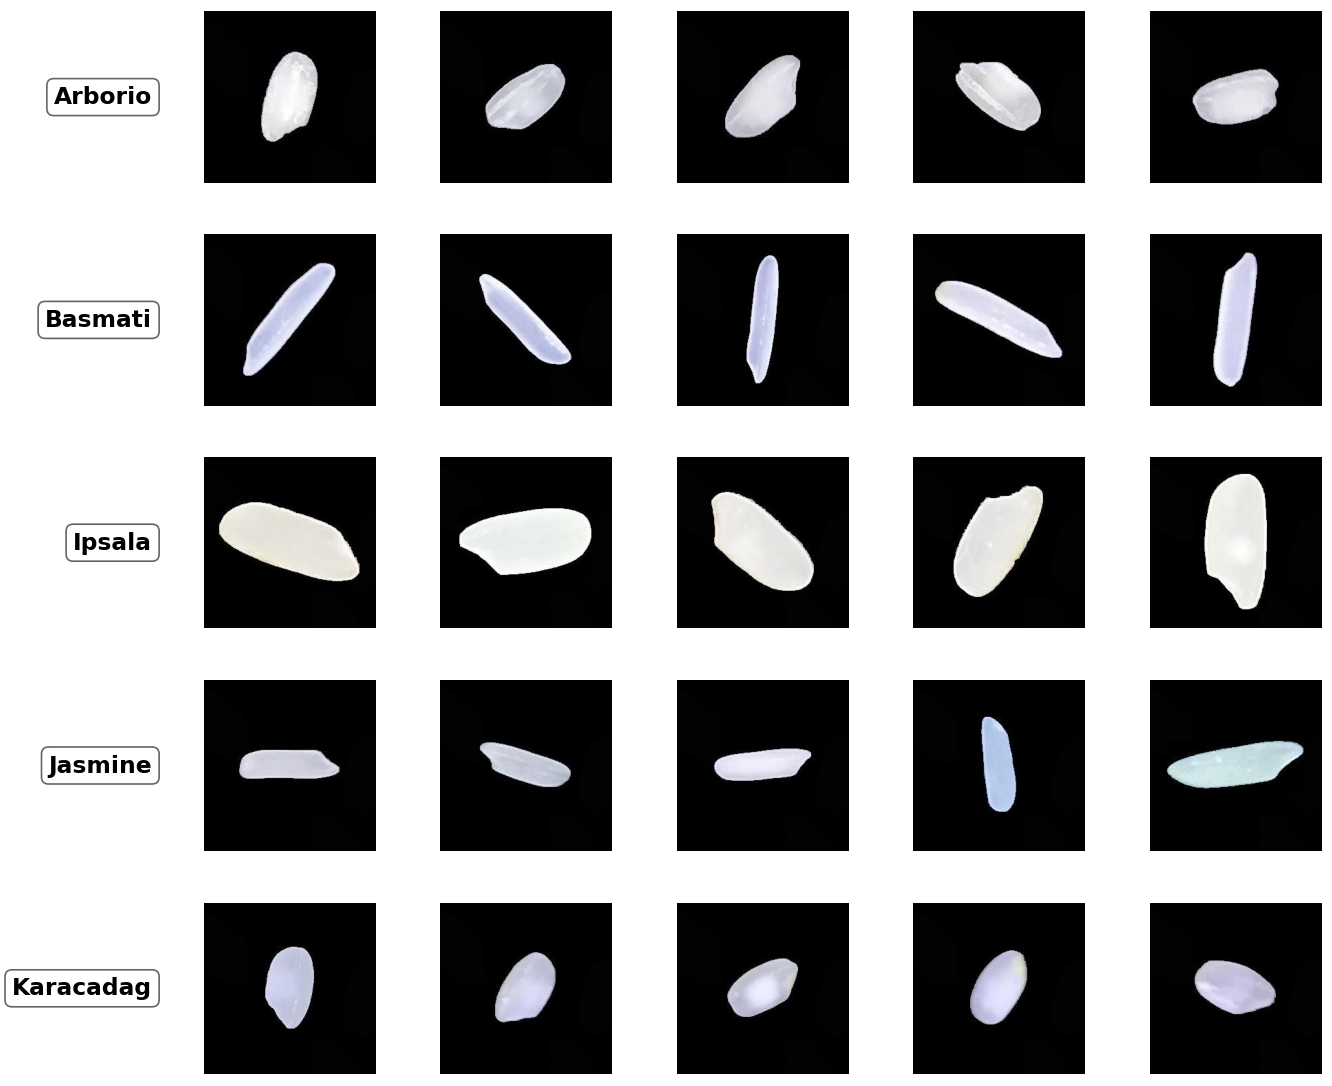

In [14]:
if __name__ == "__main__":
    fig = plot_category_samples(
        dataset_path="Rice_Image_Dataset/",
        samples_per_category=5,
        figsize=(16, 9),
        label_fontsize=14,
        dpi=120
    )

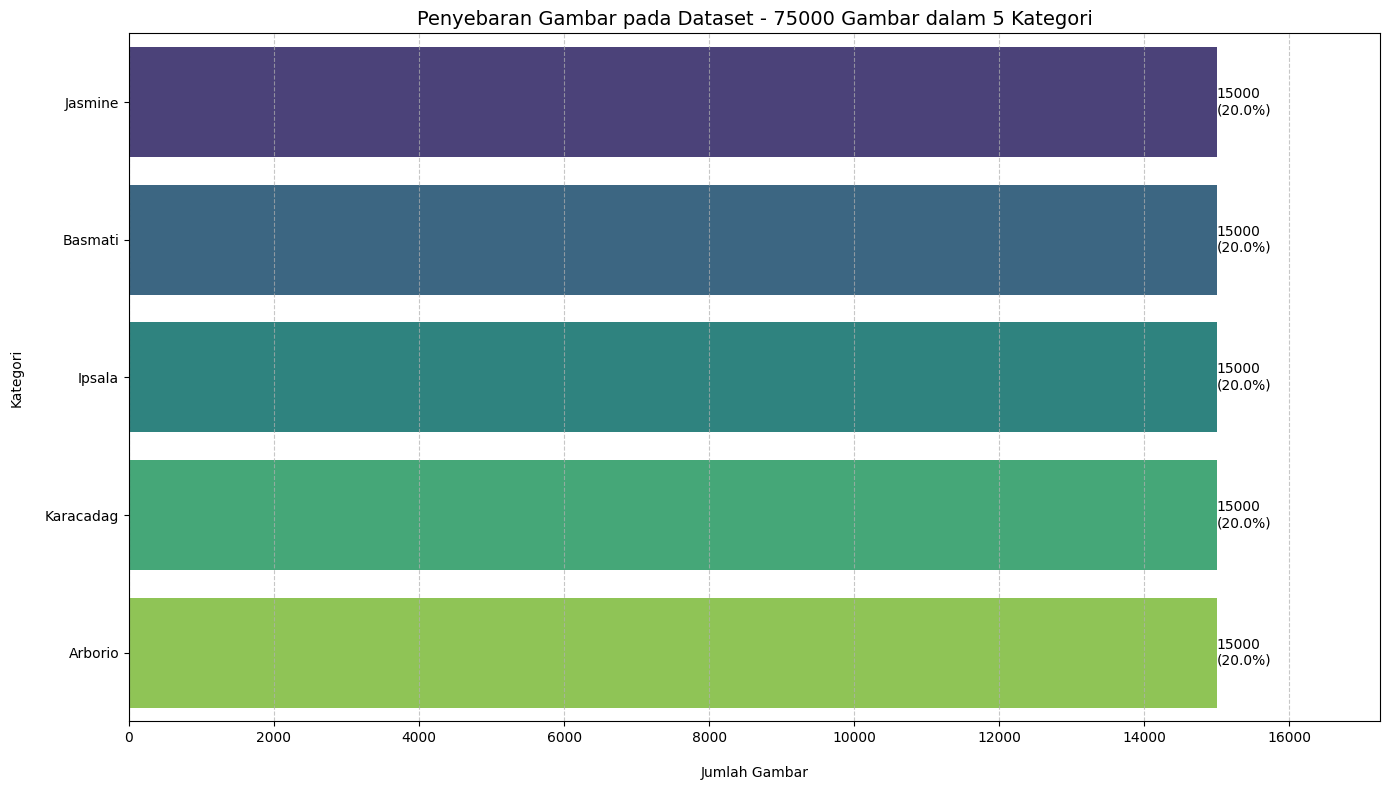


Contoh data:
                                                 path            file_name  \
27216   Rice_Image_Dataset/Basmati/basmati (2060).jpg   basmati (2060).jpg   
62892    Rice_Image_Dataset/Arborio/Arborio (661).jpg    Arborio (661).jpg   
26057  Rice_Image_Dataset/Basmati/basmati (11231).jpg  basmati (11231).jpg   
40243    Rice_Image_Dataset/Ipsala/Ipsala (13130).jpg   Ipsala (13130).jpg   
27692   Rice_Image_Dataset/Basmati/basmati (5167).jpg   basmati (5167).jpg   

         label extension  
27216  Basmati      .jpg  
62892  Arborio      .jpg  
26057  Basmati      .jpg  
40243   Ipsala      .jpg  
27692  Basmati      .jpg  


In [15]:
if __name__ == "__main__":
    dataset_df = analyze_dataset_distribution(dataset_path='Rice_Image_Dataset/')
    print("\nContoh data:")
    print(dataset_df.sample(5))

#### Split Dataset

In [16]:
import shutil
import random
from pathlib import Path
from tqdm import tqdm

def split_rice_dataset(
    base_dir="Rice_Image_Dataset",
    output_dir="Rice_Dataset_Split",
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15
):
    base_path = Path(base_dir)
    output_path = Path(output_dir)

    # Pastikan output directory bersih
    if output_path.exists():
        shutil.rmtree(output_path)
    output_path.mkdir(parents=True)

    # Buat direktori untuk train, val, dan test
    for split in ["train", "val", "test"]:
        (output_path / split).mkdir(parents=True)

    # Loop untuk setiap class di direktori dataset
    for class_dir in base_path.iterdir():
        if not class_dir.is_dir() or "_aug" in class_dir.name:
            continue  # Lewati folder augmentasi

        class_name = class_dir.name
        aug_dir = base_path / f"{class_name}_aug"  # Folder augmentasi

        # Ambil semua file gambar dari class tersebut
        all_images = list(class_dir.glob("*.*"))
        random.shuffle(all_images)

        total = len(all_images)
        train_count = int(total * train_ratio)
        val_count = int(total * val_ratio)

        # Pisahkan menjadi train, val, dan test
        train_files = all_images[:train_count]
        val_files = all_images[train_count:train_count + val_count]
        test_files = all_images[train_count + val_count:]

        # Salin gambar ke masing-masing folder split
        for split, files in zip(["train", "val", "test"], [train_files, val_files, test_files]):
            split_class_dir = output_path / split / class_name
            split_class_dir.mkdir(parents=True, exist_ok=True)
            for f in files:
                shutil.copy(f, split_class_dir / f.name)

        # Tambahkan gambar augmentasi ke folder training set
        if aug_dir.exists():
            aug_files = list(aug_dir.glob("*.*"))
            train_aug_dir = output_path / "train" / class_name
            train_aug_dir.mkdir(parents=True, exist_ok=True)
            for f in tqdm(aug_files, desc=f"Copying {class_name}_aug to train"):
                shutil.copy(f, train_aug_dir / f.name)

    print(f"\nSplit selesai. Dataset tersedia di folder: '{output_dir}'")


# Panggil fungsinya
if __name__ == "__main__":
    split_rice_dataset(base_dir="Rice_Image_Dataset", output_dir="Rice_Dataset_Split")



Split selesai. Dataset tersedia di folder: 'Rice_Dataset_Split'


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan path ke direktori dataset
TRAIN_DIR = "Rice_Dataset_Split/train"
VAL_DIR = "Rice_Dataset_Split/val"
TEST_DIR = "Rice_Dataset_Split/test"

# Generator untuk validasi dan testing
basic_datagen = ImageDataGenerator(rescale=1./255)

# Generator untuk training data
train_generator = basic_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(64, 64),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=True,
    seed=42
)

# Generator untuk validation data
val_generator = basic_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(64, 64),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

# Generator untuk testing data
test_generator = basic_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(64, 64),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)


Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


In [18]:
for x, y in train_generator:
    print(f"Input shape: {x.shape}")
    print(f"Label shape: {y.shape}")
    break

Input shape: (32, 64, 64, 3)
Label shape: (32, 5)


In [19]:
# Menampilkan indeks kelas dari masing-masing generator
print("Kelas pada data train:", train_generator.class_indices)
print("Kelas pada data validasi:", val_generator.class_indices)
print("Kelas pada data test:", test_generator.class_indices)


Kelas pada data train: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
Kelas pada data validasi: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
Kelas pada data test: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


## Modelling

In [20]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_1 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# Flatten layer
model_1.add(Flatten())
# 1nd Dense Layer
model_1.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_1.add(Dropout(0.5))
# 2nd Dense Layer
model_1.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_1.add(Dropout(0.3))

# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_1.add(Dense(1, activation='sigmoid'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_1.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_1.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,402,881 (5.35 MB)

 Trainable params: 1,402,689 (5.35 MB)

 Non-trainable params: 192 (768.00 B)

None


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membuat model
model_1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 kelas untuk jenis beras
])

# Compile model
model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,845 (2.61 MB)

 Trainable params: 683,845 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import os
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Path ke folder train
train_dir = '/content/Rice_Dataset_Split/train'

# Ambil semua nama kelas
classes = os.listdir(train_dir)

# Hitung jumlah gambar tiap kelas
class_counts = {}
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    class_counts[class_name] = len(os.listdir(class_path))

# Buat label untuk semua gambar
labels = []
for idx, class_name in enumerate(classes):
    labels += [idx] * class_counts[class_name]

# Hitung class_weight
class_weights_list = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)

# Bentuk dictionary
class_weights = {i : class_weights_list[i] for i in range(len(classes))}

print("Class Weights:", class_weights)


Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0), 4: np.float64(1.0)}


In [24]:
history_1 = model_1.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    class_weight=class_weights
)


Epoch 1/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 359s 219ms/step - accuracy: 0.9843 - loss: 0.0515 - val_accuracy: 0.9841 - val_loss: 0.0509
Epoch 2/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 354s 216ms/step - accuracy: 0.9888 - loss: 0.0368 - val_accuracy: 0.9946 - val_loss: 0.0146
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 352s 214ms/step - accuracy: 0.9914 - loss: 0.0294 - val_accuracy: 0.9948 - val_loss: 0.0179
Epoch 4/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 381s 214ms/step - accuracy: 0.9924 - loss: 0.0254 - val_accuracy: 0.9885 - val_loss: 0.0367
Epoch 5/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 352s 214ms/step - accuracy: 0.9934 - loss: 0.0233 - val_accuracy: 0.9964 - val_loss: 0.0132
Epoch 6/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 352s 214ms/step - accuracy: 0.9915 - loss: 0.0283 - val_accuracy: 0.9967 - val_loss: 0.0121
Epoch 7/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 354s 216ms/step - accuracy: 0.9948 - loss: 0.0181 - val_accuracy: 0.9965 - val_loss: 0.0091
Epoch 8/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 356s 217ms/step - ac

In [25]:
# Callback untuk monitoring training
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
]

## Evaluasi dan Visualisasi

Test Loss: 0.0099
Test Accuracy: 0.9977


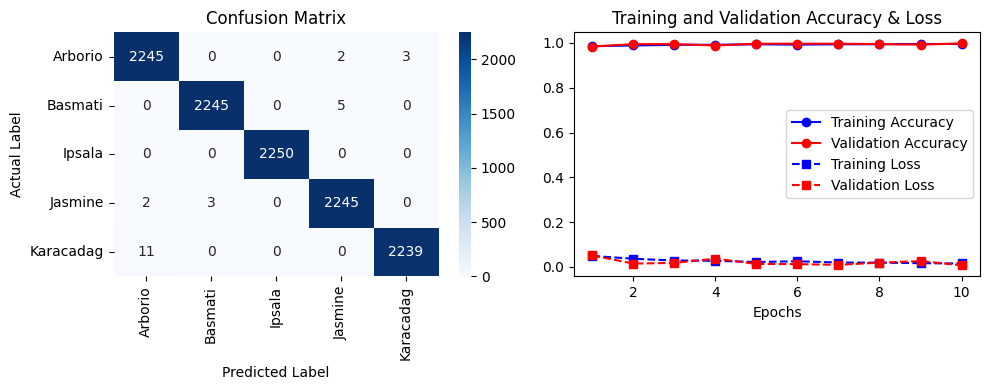


Classification Report:
              precision    recall  f1-score   support

     Arborio       0.99      1.00      1.00      2250
     Basmati       1.00      1.00      1.00      2250
      Ipsala       1.00      1.00      1.00      2250
     Jasmine       1.00      1.00      1.00      2250
   Karacadag       1.00      1.00      1.00      2250

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250



In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# --- Evaluasi Model ---
# Evaluasi test set
test_loss, test_acc = model_1.evaluate(test_generator, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Prediksi test set
y_pred_probs = model_1.predict(test_generator, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# --- Visualisasi Akurasi dan Loss ---
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.plot(epochs, loss, 'bs--', label='Training Loss')
plt.plot(epochs, val_loss, 'rs--', label='Validation Loss')
plt.title('Training and Validation Accuracy & Loss')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(test_generator.classes, y_pred_classes, target_names=test_generator.class_indices.keys()))


In [27]:
# Evaluasi di test set
test_loss, test_accuracy = model_1.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


352/352 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.9982 - loss: 0.0094
Test Accuracy: 0.9977
Test Loss: 0.0099


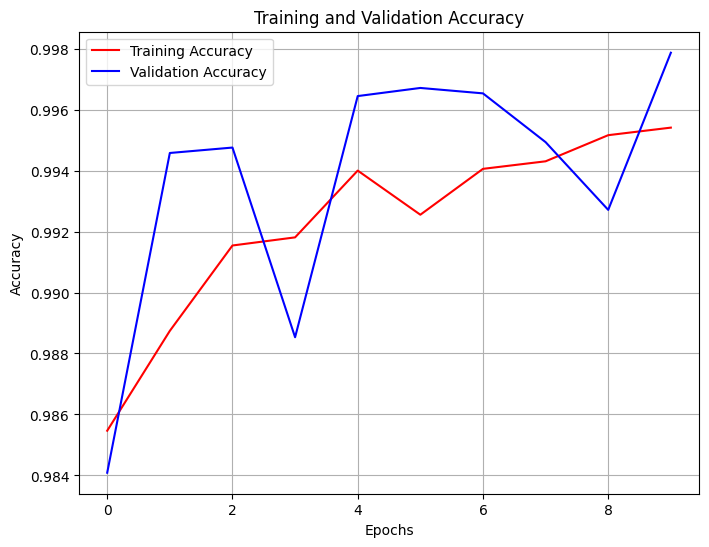

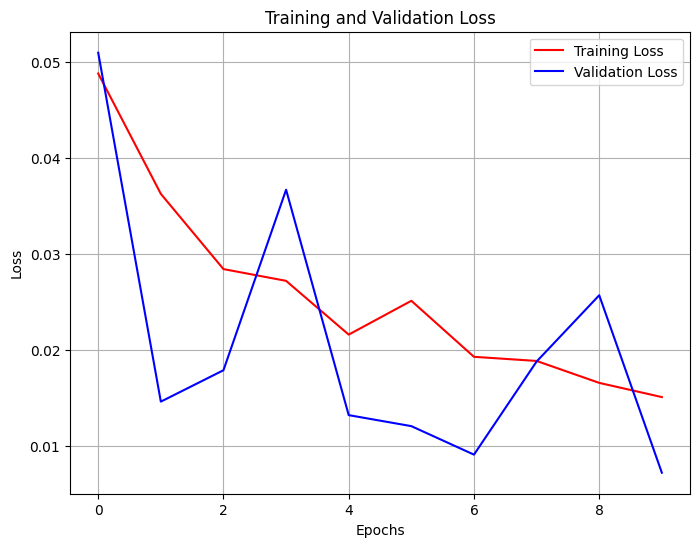

In [28]:
import matplotlib.pyplot as plt

# Ambil data dari history
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Konversi Model

In [29]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Menyimpan model

In [30]:
import os
import tensorflow as tf

# Path penyimpanan di Google Drive
save_dir = '/content/drive/MyDrive/submission_4/saved_model'
os.makedirs(save_dir, exist_ok=True)

# Simpan model_1 ke format SavedModel
tf.saved_model.save(model_1, save_dir)

print(f"Model telah diexport dalam format SavedModel (dengan saved_model.pb) di: {save_dir}")


Model telah diexport dalam format SavedModel (dengan saved_model.pb) di: /content/drive/MyDrive/submission_4/saved_model


## TFJs

In [31]:
tfjs_dir = '/content/drive/MyDrive/submission_4/tfjs_model'
os.makedirs(tfjs_dir, exist_ok=True)

In [32]:
!pip install tensorflowjs

!tensorflowjs_converter \
  --input_format=tf_saved_model \
  --output_format=tfjs_graph_model \
  --signature_name=serving_default \
  --saved_model_tags=serve \
  "/content/drive/MyDrive/submission_4/saved_model" \
  "/content/drive/MyDrive/submission_4/tfjs_model"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
2025-04-27 09:59:41.268943: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745747981.299510   22132 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:174

In [33]:
import os
import shutil

# Ambil nama-nama kelas dari train_generator
class_names = list(train_generator.class_indices.keys())

# Path untuk SavedModel dan target TFJS
save_dir = '/content/drive/MyDrive/submission_4/saved_model'
tfjs_dir = '/content/drive/MyDrive/submission_4/tfjs_model'
os.makedirs(tfjs_dir, exist_ok=True)

# Hapus folder tfjs jika ada
if os.path.exists(tfjs_dir):
    shutil.rmtree(tfjs_dir)
os.makedirs(tfjs_dir, exist_ok=True)

# Install TensorFlowJS
!pip install tensorflowjs

# Konversi SavedModel ke TFJS
!tensorflowjs_converter \
  --input_format=tf_saved_model \
  --output_format=tfjs_graph_model \
  --signature_name=serving_default \
  --saved_model_tags=serve \
  "{save_dir}" "{tfjs_dir}"

# Simpan labels.txt
labels_path = os.path.join(tfjs_dir, 'labels.txt')
with open(labels_path, 'w') as f:
    for label in class_names:
        f.write(label + '\n')

print(f"✅ Model TFJS berhasil disimpan di: {tfjs_dir}")
print(f"✅ Labels berhasil disimpan di: {labels_path}")


2025-04-27 10:00:54.207150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745748054.259174   22492 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745748054.275626   22492 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-04-27 10:01:01.209894: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1745748061.473344   22492 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00

# TFLite

In [35]:
import os
import tensorflow as tf

# Ambil nama-nama kelas dari train_generator
class_names = list(train_generator.class_indices.keys())

# Membuat folder untuk menyimpan model TFLite dan label
tflite_dir = '/content/drive/MyDrive/submission_4/tflite'
os.makedirs(tflite_dir, exist_ok=True)

# Konversi model SavedModel ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(save_dir)
tflite_model = converter.convert()

# Simpan model TFLite ke dalam folder tujuan
tflite_model_path = os.path.join(tflite_dir, 'model.tflite')
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

# Simpan label ke dalam file labels.txt
labels_path = os.path.join(tflite_dir, 'label.txt')
with open(labels_path, 'w') as f:
    for label in class_names:
        f.write(label + '\n')

print(f"✅ Model TFLite berhasil disimpan di: {tflite_model_path}")
print(f"✅ Labels berhasil disimpan di: {labels_path}")


✅ Model TFLite berhasil disimpan di: /content/drive/MyDrive/submission_4/tflite/model.tflite
✅ Labels berhasil disimpan di: /content/drive/MyDrive/submission_4/tflite/label.txt


## Inference (Optional)
hasil inferensi saya screnshoot di readmee

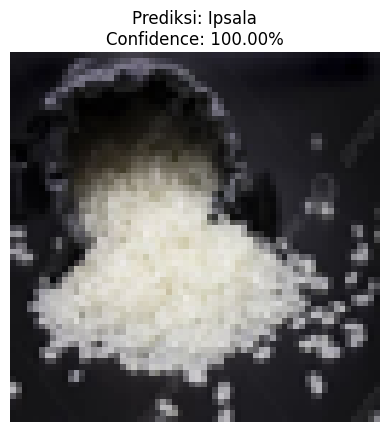

Label Prediksi: Ipsala
Tingkat Kepercayaan: 100.00%


In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load model SavedModel
saved_model_dir = '/content/drive/MyDrive/submission_4/saved_model'
loaded_model = tf.saved_model.load(saved_model_dir)
infer = loaded_model.signatures["serving_default"]

# List nama kelas sesuai output model
labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Fungsi preprocess gambar
def preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img = img.resize((64, 64))  # Sesuai input size model
    img_array = np.array(img).astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Tambah dimensi batch
    return img_array, img

# Fungsi untuk prediksi
def predict_image(img_path):
    img_array, img = preprocess_image(img_path)
    input_key = list(infer.structured_input_signature[1].keys())[0]
    prediction = infer(**{input_key: tf.convert_to_tensor(img_array)})
    output_key = list(prediction.keys())[0]
    probs = prediction[output_key].numpy()

    predicted_idx = np.argmax(probs)
    confidence = np.max(probs)
    predicted_label = labels[predicted_idx]

    # Tampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_label}\nConfidence: {confidence:.2%}")
    plt.show()

    print(f"Label Prediksi: {predicted_label}")
    print(f"Tingkat Kepercayaan: {confidence:.2%}")

# Contoh penggunaan
img_path = '/content/drive/MyDrive/submission_4/tes.jpg'  # Ganti dengan path gambar
predict_image(img_path)


In [38]:
 !pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.21.0.37.6
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.1
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confect

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
with open('/content/drive/My Drive/submission_4/README.md', 'w') as f:
    f.write("""
# Proyek Klasifikasi Gambar Beras

Proyek ini adalah **Proyek Klasifikasi Gambar Beras** yang menggunakan dataset gambar beras berdasarkan kelasnya. Dalam proyek ini, berbagai teknik pembelajaran mesin dan pemrosesan gambar diterapkan untuk mengklasifikasikan gambar sesuai dengan kategori yang telah ditentukan.

### **Deskripsi Proyek**
1. **Tujuan**: Mengembangkan model klasifikasi gambar yang dapat mengidentifikasi dan mengelompokkan gambar beras berdasarkan fitur visualnya.
2. **Dataset**: Dataset yang digunakan adalah kumpulan gambar beras dari Kaggle yang memiliki variasi bentuk dan warna.
3. **Teknik Pemrosesan Data**:
   - Penggunaan berbagai pustaka Python seperti NumPy, Pandas, dan Sklearn untuk manipulasi data.
   - Pemrosesan citra dengan Skimage dan OpenCV.
   - Augmentasi gambar untuk meningkatkan performa model.
4. **Model yang Digunakan**:
   - Model berbasis **TensorFlow dan Keras**, termasuk arsitektur populer seperti MobileNet dan DenseNet121.
   - Penerapan teknik **Convolutional Neural Networks (CNN)** untuk ekstraksi fitur visual.
5. **Evaluasi Model**:
   - Pembagian dataset menjadi data **latih dan uji** untuk evaluasi performa.
   - Penggunaan **metrik evaluasi** seperti confusion matrix dan classification report untuk menganalisis hasil.

## Cara Pakai

Berikut adalah langkah-langkah untuk menggunakan proyek **Klasifikasi Gambar Beras** di Google Colab:

### **1. Persiapan Awal**
- Pastikan Anda memiliki akun Google dan sudah masuk ke Google Colab.
- **Buka proyek Colab** melalui link berikut: [Proyek Klasifikasi Gambar](https://colab.research.google.com/drive/1plhq93FQ4SSqxcq7LEjibzZo916LV6o1#scrollTo=U4cU5-P9wzbF).
- Pastikan koneksi ke GPU aktif dengan pergi ke **Runtime** → **Change runtime type** → **Hardware accelerator** → pilih **T4 GPU**.

### **2. Install dan Import Library**
- Jalankan sel **"Import Semua Packages/Library yang Digunakan"** untuk mengimpor semua pustaka seperti NumPy, Pandas, TensorFlow, dan Skimage.
- Pastikan semua dependensi telah terinstal dengan baik.

### **3. Persiapan Data**
- **Upload dataset** jika belum tersedia dengan menjalankan sel yang berisi `files.upload()`.
- Dataset akan diproses dan dibagi menjadi **data latih dan uji** menggunakan `train_test_split`.

### **4. Pembuatan dan Pelatihan Model**
- Model berbasis **CNN (Convolutional Neural Networks)** akan dibuat menggunakan arsitektur seperti **MobileNet** atau **DenseNet121**.
- Jalankan sel yang berisi **ImageDataGenerator** untuk augmentasi data.
- Mulai pelatihan model dengan `model.fit()` menggunakan dataset yang sudah diolah.

### **5. Evaluasi Model**
- Gunakan **confusion matrix** dan **classification report** untuk menilai performa model.
- Jalankan sel evaluasi yang berisi `model.evaluate()` untuk melihat akurasi.

### **6. Prediksi Gambar**
- Upload gambar baru untuk diuji.
- Gunakan `model.predict()` untuk mendapatkan hasil klasifikasi.
- Visualisasikan hasil dengan `plt.imshow()` dan label prediksi.
    """)


In [48]:
!cat README.md


# Proyek Klasifikasi Gambar

Proyek ini adalah **Proyek Klasifikasi Gambar Beras** yang menggunakan dataset gambar beras berdasarkan kelasnya. Dalam proyek ini, berbagai teknik pembelajaran mesin dan pemrosesan gambar diterapkan untuk mengklasifikasikan gambar sesuai dengan kategori yang telah ditentukan. 

### **Deskripsi Proyek**
1. **Tujuan**: Mengembangkan model klasifikasi gambar yang dapat mengidentifikasi dan mengelompokkan gambar beras berdasarkan fitur visualnya.
2. **Dataset**: Dataset yang digunakan adalah kumpulan gambar beras dari Kaggle yang memiliki variasi bentuk dan warna.
3. **Teknik Pemrosesan Data**:
   - Penggunaan berbagai pustaka Python seperti NumPy, Pandas, dan Sklearn untuk manipulasi data.
   - Pemrosesan citra dengan Skimage dan OpenCV.
   - Augmentasi gambar untuk meningkatkan performa model.
4. **Model yang Digunakan**:
   - Model berbasis **TensorFlow dan Keras**, termasuk arsitektur populer seperti MobileNet dan DenseNet121.
   - Penerapan teknik **Conv